# WeatherPy
----
* RICARDO REYNOSO RAMOS HOMEWORK

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Set the query url to call data biding with the api_key from openweathermap
units = 'imperial'   #Set to Farenheit, openweather.com
query=f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q='

In [20]:
#  We need to establish these lists to fill in the data from weathermap 
countries=[]
latitudes=[]
longitudes=[]
cloud=[]
dates=[]
humid=[]
windspeed=[]
tempmax=[]
city_next = []

# Establish the counters for looping into coordinates
# r stands for the 'nth' processing Record
# s stands for the set for the current iteration until reaches the limit, then reset

r = 0
s = 1
c=0
# Start with the looping to call cities and append the data into the lists
for city in cities:
    try:
        response = requests.get(query + city.replace(" ","&")).json()
        countries.append(response['sys']['country'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloud.append(response['clouds']['all'])
        dates.append(response['dt'])
        humid.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        tempmax.append(response['main']['temp_max'])
         
        #48, maximum limit for processing records per coordinates into the loop. Else next loop and so on.
        if r > 48:
            r = 1
            s += 1
            city_next.append(city)
        else:
            r+= 1
            city_next.append(city)
            c+=1
        print(f'City Number:{c}, Processing Record {r} of Set {s} | {city}')
    except Exception:
        print("City not found. Skipping...")
        

City Number:1, Processing Record 1 of Set 1 | constitucion
City Number:2, Processing Record 2 of Set 1 | bredasdorp
City not found. Skipping...
City Number:3, Processing Record 3 of Set 1 | punta arenas
City Number:4, Processing Record 4 of Set 1 | fort-shevchenko
City not found. Skipping...
City Number:5, Processing Record 5 of Set 1 | souillac
City Number:6, Processing Record 6 of Set 1 | iquira
City Number:7, Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
City Number:8, Processing Record 8 of Set 1 | fayaoue
City not found. Skipping...
City Number:9, Processing Record 9 of Set 1 | keetmanshoop
City Number:10, Processing Record 10 of Set 1 | albany
City Number:11, Processing Record 11 of Set 1 | mataura
City Number:12, Processing Record 12 of Set 1 | oussouye
City Number:13, Processing Record 13 of Set 1 | ushuaia
City Number:14, Processing Record 14 of Set 1 | nouakchott
City not found. Skipping...
City Number:15, Processing Record 15 of Set 1 | serov
City Nu

City not found. Skipping...
City Number:132, Processing Record 36 of Set 3 | zhigansk
City Number:133, Processing Record 37 of Set 3 | maun
City Number:134, Processing Record 38 of Set 3 | san felipe
City Number:135, Processing Record 39 of Set 3 | auki
City Number:136, Processing Record 40 of Set 3 | saint-georges
City not found. Skipping...
City Number:137, Processing Record 41 of Set 3 | pokhara
City not found. Skipping...
City Number:138, Processing Record 42 of Set 3 | hithadhoo
City Number:139, Processing Record 43 of Set 3 | illapel
City Number:140, Processing Record 44 of Set 3 | noumea
City Number:141, Processing Record 45 of Set 3 | kahului
City Number:142, Processing Record 46 of Set 3 | iqaluit
City Number:143, Processing Record 47 of Set 3 | tagab
City Number:144, Processing Record 48 of Set 3 | daman
City not found. Skipping...
City Number:145, Processing Record 49 of Set 3 | padang
City Number:145, Processing Record 1 of Set 4 | tongchuan
City Number:146, Processing Reco

City Number:264, Processing Record 24 of Set 6 | dergachi
City Number:265, Processing Record 25 of Set 6 | sonoita
City Number:266, Processing Record 26 of Set 6 | kakonko
City Number:267, Processing Record 27 of Set 6 | creel
City Number:268, Processing Record 28 of Set 6 | esperance
City Number:269, Processing Record 29 of Set 6 | janakpur
City Number:270, Processing Record 30 of Set 6 | sumbe
City Number:271, Processing Record 31 of Set 6 | puerto escondido
City Number:272, Processing Record 32 of Set 6 | marrakesh
City Number:273, Processing Record 33 of Set 6 | biloela
City Number:274, Processing Record 34 of Set 6 | mae ramat
City not found. Skipping...
City not found. Skipping...
City Number:275, Processing Record 35 of Set 6 | santa cruz de la palma
City Number:276, Processing Record 36 of Set 6 | bethel
City Number:277, Processing Record 37 of Set 6 | beira
City Number:278, Processing Record 38 of Set 6 | haileybury
City Number:279, Processing Record 39 of Set 6 | port said
Ci

City Number:394, Processing Record 10 of Set 9 | tilichiki
City Number:395, Processing Record 11 of Set 9 | vangaindrano
City not found. Skipping...
City Number:396, Processing Record 12 of Set 9 | leshukonskoye
City Number:397, Processing Record 13 of Set 9 | paterno
City Number:398, Processing Record 14 of Set 9 | snezhnogorsk
City Number:399, Processing Record 15 of Set 9 | ormara
City Number:400, Processing Record 16 of Set 9 | college
City Number:401, Processing Record 17 of Set 9 | naze
City Number:402, Processing Record 18 of Set 9 | bandarbeyla
City Number:403, Processing Record 19 of Set 9 | san patricio
City Number:404, Processing Record 20 of Set 9 | moranbah
City Number:405, Processing Record 21 of Set 9 | sungairaya
City Number:406, Processing Record 22 of Set 9 | husavik
City Number:407, Processing Record 23 of Set 9 | sturgeon falls
City Number:408, Processing Record 24 of Set 9 | tvoroyri
City Number:409, Processing Record 25 of Set 9 | cedar city
City Number:410, Proce

City Number:521, Processing Record 41 of Set 11 | rudarpur
City not found. Skipping...
City Number:522, Processing Record 42 of Set 11 | panzhihua
City Number:523, Processing Record 43 of Set 11 | las torres de cotillas
City Number:524, Processing Record 44 of Set 11 | soyo
City Number:525, Processing Record 45 of Set 11 | changping
City Number:526, Processing Record 46 of Set 11 | marathon
City Number:527, Processing Record 47 of Set 11 | pisco
City Number:528, Processing Record 48 of Set 11 | lazuri
City Number:529, Processing Record 49 of Set 11 | issia
City Number:529, Processing Record 1 of Set 12 | pampa
City Number:530, Processing Record 2 of Set 12 | ozinki
City Number:531, Processing Record 3 of Set 12 | katobu
City Number:532, Processing Record 4 of Set 12 | carbondale
City Number:533, Processing Record 5 of Set 12 | lumberton
City Number:534, Processing Record 6 of Set 12 | alzamay
City Number:535, Processing Record 7 of Set 12 | lata
City not found. Skipping...
City Number:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# With the information and once the lists are filled in, create a dictionary then convert into a Data Frame

weatherfinal = {
    "City":city_next,
    "Cloudiness":cloud,
    "Country":countries,
    "Date":dates,
    "Humidity":humid,
    "Lat":latitudes,
    "Lng":longitudes,
    "Max Temp":tempmax,
    "Wind Speed":windspeed
}



In [31]:
weatherfinaldf = pd.DataFrame(weatherfinal)
weatherfinaldf.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,constitucion,20,MX,1570643084,43,23.99,-104.67,75.00,3.36
1,bredasdorp,32,ZA,1570643076,50,-34.53,20.04,51.80,4.70
2,punta arenas,20,PH,1570643059,78,14.18,121.12,81.00,2.24
3,fort-shevchenko,55,KZ,1570643452,76,44.51,50.26,55.13,6.80
4,souillac,20,FR,1570643167,67,45.60,-0.60,63.00,9.17
5,iquira,75,CO,1570643453,57,2.65,-75.64,80.60,4.70
6,mys shmidta,95,RU,1570643256,97,62.06,48.62,31.91,5.57
7,fayaoue,27,NC,1570643454,81,-20.65,166.53,72.41,9.16
8,keetmanshoop,0,NA,1570643455,24,-26.57,18.15,71.60,16.11
9,albany,75,US,1570643094,55,42.65,-73.75,62.01,5.82


In [24]:
# Save the DataFrame into a CSV file, named output_data_file) as 
# Set the location and name of the csv file then get into the csv
output_data_file = "Output/weather_df.csv"


In [25]:
weatherfinaldf.to_csv(output_data_file)

In [26]:
weatherfinaldf.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

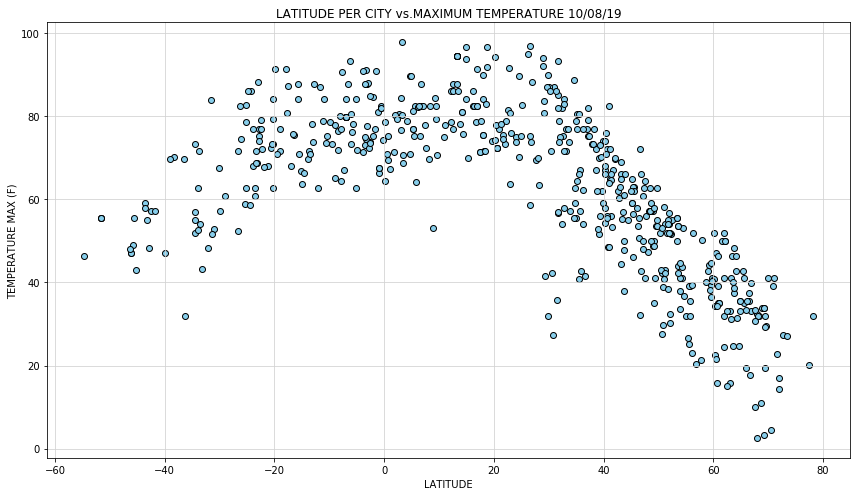

In [27]:
#Plotting the values, City Latitude vs. Temperature Maximum
plt.figure(figsize = (12,7))
plt.scatter(weatherfinaldf["Lat"],weatherfinaldf["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("LATITUDE PER CITY vs.MAXIMUM TEMPERATURE 10/08/19")
plt.xlabel("LATITUDE")
plt.ylabel("TEMPERATURE MAX (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.tight_layout()
plt.savefig("Output/CityLatTempMax.png")
plt.show()

### LATITUDES AND MAXIMUM TEMPERATURE ANALYSIS

* From this plot  we can conclude at first sight with the following: Temperature decreases significantly as the random goes
  farther from the Meridian 0, there is a direct correlation between Temperature and Latitude.
  
* The warmer temperatures are located between the latitudes with a difference of 20 degrees

* The coldest temperatures are heading straight right crossing the Meridian 0 decreasing significantly from 60 to 80 degrees
  
  


#### Latitude vs. Humidity Plot

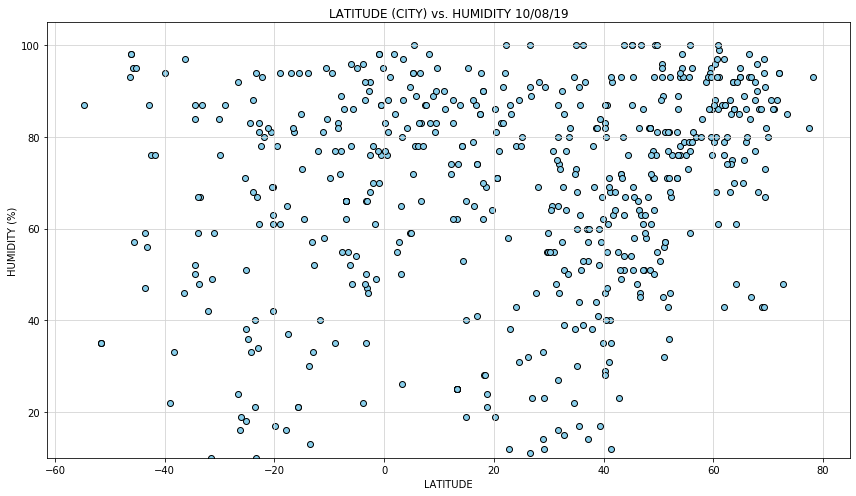

In [29]:
plt.figure(figsize = (12,7))
plt.scatter(weatherfinaldf["Lat"],weatherfinaldf["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("LATITUDE (CITY) vs. HUMIDITY 10/08/19")
plt.xlabel("LATITUDE")
plt.ylabel("HUMIDITY (%)")
plt.ylim(10,105)
plt.tight_layout()
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Output/CityLatHumid.png")
plt.show()

### LATITUDES AND HUMIDITY ANALYSIS

* it seems to be a distributed humidity values among the cities and its correspondent latitudes, however we can observe the following:
    - Humidity gets more concentraded with values above 60% for those cities whose latitudes are located between 40 a 60 degrees, getting more concentraded at the point of 60. 
    -Near the meridian 0, humidity values tend to be stable and more distritubed.

* Finally, I would take a look to the SEM analysis and the statistics standard deviation to deduct a more accurate statement.

#### Latitude vs. Cloudiness Plot

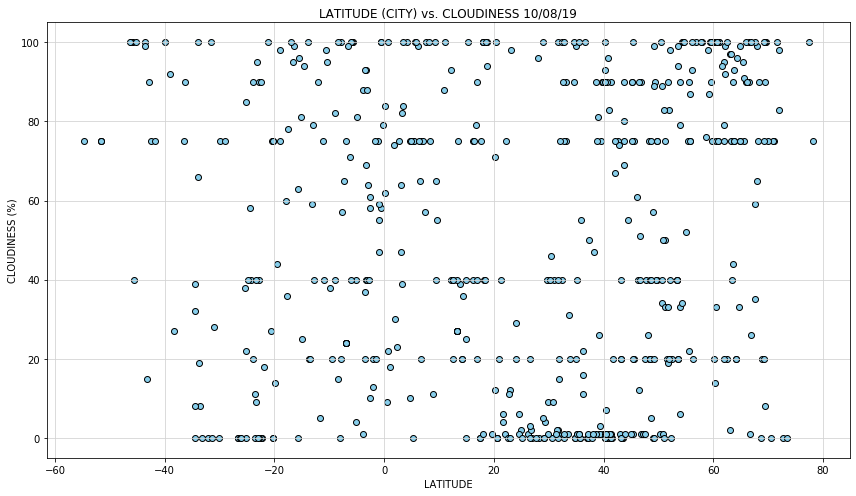

In [33]:
plt.figure(figsize = (12,7))
plt.scatter(weatherfinaldf["Lat"],weatherfinaldf["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("LATITUDE (CITY) vs. CLOUDINESS 10/08/19")
plt.xlabel("LATITUDE")
plt.ylabel("CLOUDINESS (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.tight_layout()
plt.savefig("Output/CityLatCloud.png")
plt.show()

### LATITUDES AND CLOUDINESS ANALYSIS

*  From this plot we cant conclude with some degree of confidence, base on the fact that there is no correlation between latitudes and values for cloudiness. That is to say, anothe variable might be interesting to plot like humidity against cloudiness or wind speed.

* I will use data iteration and regression so in case might find another interesting values. Standard deviation would be applied


#### Latitude vs. Wind Speed Plot

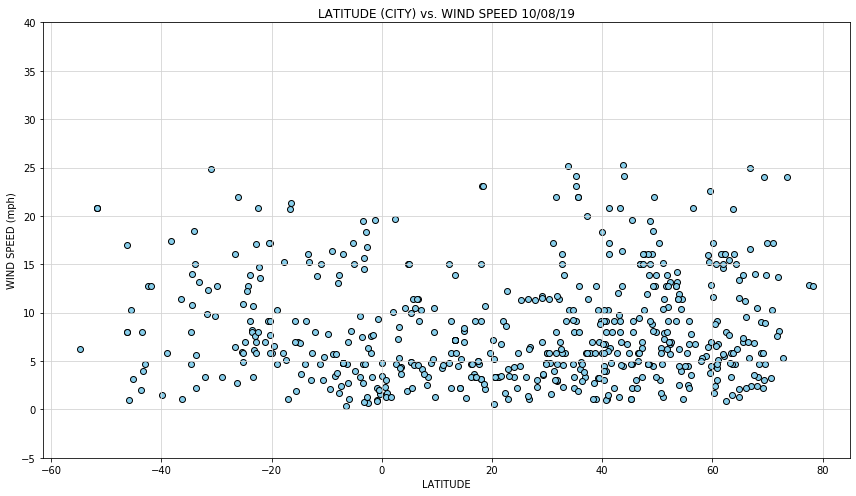

In [32]:
plt.figure(figsize = (12,7))
plt.scatter(weatherfinaldf["Lat"],weatherfinaldf["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("LATITUDE (CITY) vs. WIND SPEED 10/08/19")
plt.xlabel("LATITUDE")
plt.ylabel("WIND SPEED (mph)")
plt.ylim(-5,40)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.tight_layout()
plt.savefig("Output/CityLatWind.png")
plt.show()

### LATITUDES AND WIND SPEED ANALYSIS

* Once again, it aint clear and a logical correlation between these two variables. Just we can observe some concentrations of scattered data ranging from 0 to 10 more concentrated between 40 a 60 degrees, the same as humidity. 

* Hence, here is one plot that might show some correlation between wind speed and humidity

#### HUMIDITY vs. WIND SPEED Plot

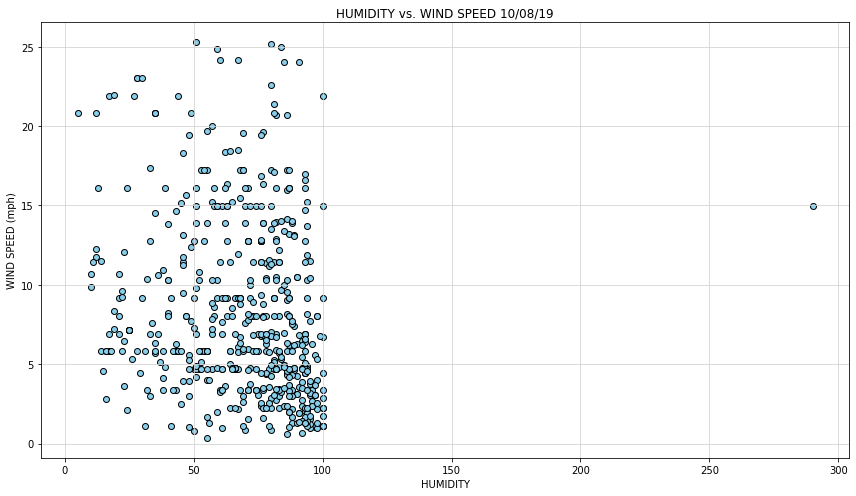

In [37]:
plt.figure(figsize = (12,7))
plt.scatter(weatherfinaldf["Humidity"],weatherfinaldf["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("HUMIDITY vs. WIND SPEED 10/08/19")
plt.xlabel("HUMIDITY")
plt.ylabel("WIND SPEED (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.tight_layout()
plt.savefig("Output/HUMIDWIND.png")
plt.show()

### LATITUDES AND WIND SPEED ANALYSIS

* Discarding the outlier, a false value. Here we can observ with certainty that there is a direct correlation between Wind Speed (The lower) the Humidity increases (the greater) getting more concentrated for values below 5 mph for the wind speed.

